In [24]:
import numpy as np
import numpy.random as nr
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split

import sklearn.model_selection as ms
from sklearn import feature_selection as fs
import sklearn.metrics as sklm
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
import seaborn as sns
import math


In [25]:
df=pd.read_csv("clean_data_with_Agegroup")


In [27]:
df['BikeBuyer'].value_counts()

0    10953
1     5451
Name: BikeBuyer, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16404 entries, 0 to 16403
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            16404 non-null  int64  
 1   CustomerID            16404 non-null  int64  
 2   FirstName             16404 non-null  object 
 3   LastName              16404 non-null  object 
 4   AddressLine1          16404 non-null  object 
 5   City                  16404 non-null  object 
 6   StateProvinceName     16404 non-null  object 
 7   CountryRegionName     16404 non-null  object 
 8   PostalCode            16404 non-null  object 
 9   PhoneNumber           16404 non-null  object 
 10  BirthDate             16404 non-null  object 
 11  Education             16404 non-null  object 
 12  Occupation            16404 non-null  object 
 13  Gender                16404 non-null  object 
 14  MaritalStatus         16404 non-null  object 
 15  HomeOwnerFlag      

In [29]:
#specify the categorical columns
cat_columns=['Education','Occupation','Gender','MaritalStatus','agegroup','HomeOwnerFlag']
for cat in cat_columns:
    print(df[cat].unique())
    


['Bachelors ' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
['M' 'F']
['M' 'S']
['25-45' '0-25' '45-55' '55-120']
[1 0]


In [30]:
numerical_columns=['NumberCarsOwned','NumberChildrenAtHome','TotalChildren','YearlyIncome']

In [31]:
def encode_string(cat_features):
    #encode string to numeric categories
    enc=preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features=enc.transform(cat_features)
    
    #Apply one-hot encodeing
    ohe=preprocessing.OneHotEncoder()
    encoded=ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [12]:
# create a list of empty lists to store categorical features
alist = [ [] for _ in range(df.shape[0]) ]
Cat_Features = np.array(alist)

for col in cat_columns:
    temp = encode_string(df[col])
    print(col,temp.shape)
    Cat_Features = np.concatenate([Cat_Features, temp], axis = 1)

# used later to identify columns to start scaling
start_num_idx = Cat_Features.shape[1] 
print(start_num_idx)

print(Cat_Features.shape)
print(Cat_Features[:2, :])   # first two sample rows 



Education (16404, 5)
Occupation (16404, 5)
Gender (16404, 2)
MaritalStatus (16404, 2)
agegroup (16404, 4)
HomeOwnerFlag (16404, 2)
20
(16404, 20)
[[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]]


In [32]:
Num_Features=np.array(df[numerical_columns])
print(Num_Features.shape)

(16404, 4)


In [33]:
Features = np.concatenate([Cat_Features, Num_Features], axis = 1)
np.set_printoptions(suppress=True) # turn off scientific display
print(Features[:2,:], Features.shape)


[[     1.      0.      0.      0.      0.      0.      0.      0.      1.
       0.      0.      1.      1.      0.      0.      1.      0.      0.
       0.      1.      0.      0.      2. 137947.]
 [     1.      0.      0.      0.      0.      0.      0.      0.      1.
       0.      0.      1.      0.      1.      0.      1.      0.      0.
       1.      0.      1.      3.      3. 101141.]] (16404, 24)


In [34]:
nr.seed(9988)
labels=np.array(df['BikeBuyer'])
indx = range(Features.shape[0])


indx = ms.train_test_split(indx, test_size = 0.3)

X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])

X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [35]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(start_num_idx)

(11482, 24) (11482,)
(4922, 24) (4922,)
20


In [36]:
scaler = preprocessing.StandardScaler().fit(X_train[:,start_num_idx:])
X_train[:,start_num_idx:] = scaler.transform(X_train[:,start_num_idx:])
X_test[:,start_num_idx:] = scaler.transform(X_test[:,start_num_idx:])
print(X_train.shape)
X_train[:3,]


(11482, 24)


array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.43811237, -0.65272852, -0.00589171, -0.7929123 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.43567715, -0.65272852, -1.19270998, -0.65094257],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
  

In [37]:
logistic_mod = linear_model.LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=1000) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [38]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-1.13731899]
[[ 0.27809673  0.19324773 -0.13902518  0.07232251 -0.4020239  -0.07482105
  -0.17302321 -0.01567378  0.09925737  0.16687856 -0.3325567   0.33517459
  -0.76713411  0.769752    0.66351943  1.16311302  0.0669247  -1.89093927
  -0.04817264  0.05079053  0.00579129  1.1778201  -0.12606007  0.39480699]]


In [39]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.94684075 0.05315925]
 [0.77946531 0.22053469]
 [0.46351327 0.53648673]
 [0.46787622 0.53212378]
 [0.09283975 0.90716025]
 [0.60787923 0.39212077]
 [0.35134434 0.64865566]
 [0.68135178 0.31864822]
 [0.62304582 0.37695418]
 [0.97932539 0.02067461]
 [0.21292933 0.78707067]
 [0.65430445 0.34569555]
 [0.20258336 0.79741664]
 [0.72267122 0.27732878]
 [0.91426803 0.08573197]]


In [40]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 1 1 1 0 1 0 0 0 1 0 1 0 0]
[0 1 0 0 0 0 0 0 1 0 0 0 0 1 0]


In [41]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2527               742
Actual negative       442              1211

Accuracy  0.76
 
           Positive      Negative
Num case     3269          1653
Precision    0.85          0.62
Recall       0.77          0.73
F1           0.81          0.67


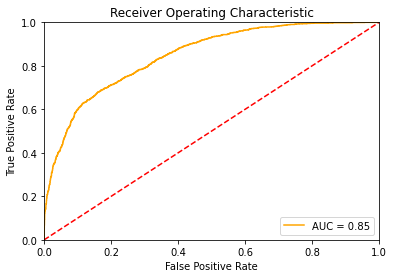

In [42]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

threshold value:  0.5
                 Confusion matrix
                 Score positive    Score negative
Actual positive      2523               746
Actual negative       441              1212

Accuracy  0.76
 
           Positive      Negative
Num case     3269          1653
Precision    0.85          0.62
Recall       0.77          0.73
F1           0.81          0.67


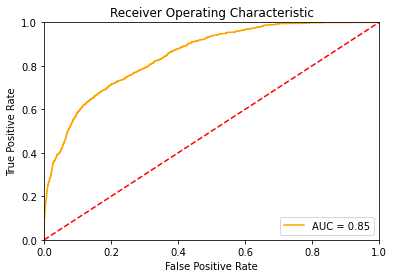

In [29]:
threshold = 0.5
print("threshold value: ", threshold)
scores = score_model(probabilities, threshold)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)


In [43]:
from sklearn.metrics import f1_score
#sklm.f1_score(y_test, y_pred, labels=np.unique(y_pred))

thresholdList = np.arange(0,1.1,0.1)
for threshold in thresholdList:
    print("threshold value: ", threshold)
    scores = score_model(probabilities, threshold)
    print_metrics(y_test, scores)  
    #plot_auc(y_test, probabilities)  
    print(80*'-')


threshold value:  0.0
                 Confusion matrix
                 Score positive    Score negative
Actual positive         0              3269
Actual negative         0              1653

Accuracy  0.34
 
           Positive      Negative
Num case     3269          1653
Precision    0.00          0.34
Recall       0.00          1.00
F1           0.00          0.50
--------------------------------------------------------------------------------
threshold value:  0.1
                 Confusion matrix
                 Score positive    Score negative
Actual positive       543              2726
Actual negative         6              1647

Accuracy  0.44
 
           Positive      Negative
Num case     3269          1653
Precision    0.99          0.38
Recall       0.17          1.00
F1           0.28          0.55
--------------------------------------------------------------------------------
threshold value:  0.2
                 Confusion matrix
                 Score positive   

D:\Project\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


threshold value:  0.64
                 Confusion matrix
                 Score positive    Score negative
Actual positive      2901               368
Actual negative       626              1027

Accuracy  0.80
 
           Positive      Negative
Num case     3269          1653
Precision    0.82          0.74
Recall       0.89          0.62
F1           0.85          0.67


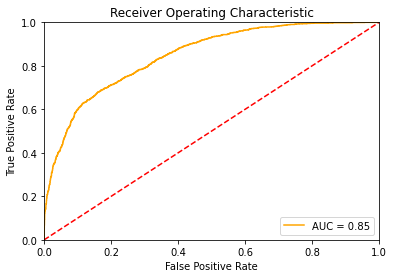

In [44]:
threshold = 0.64
print("threshold value: ", threshold)
scores = score_model(probabilities, threshold)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)  


                 Confusion matrix
                 Score positive    Score negative
Actual positive      3269                 0
Actual negative      1653                 0

Accuracy  0.66
 
           Positive      Negative
Num case     3269          1653
Precision    0.66          0.00
Recall       1.00          0.00
F1           0.80          0.00


D:\Project\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


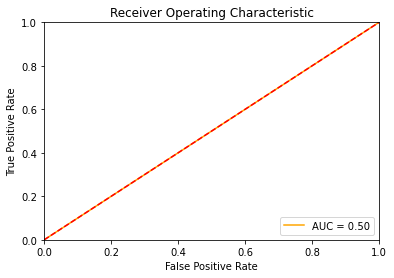

In [45]:
probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)), 
                                 np.zeros((probabilities.shape[0], 1))),
                                 axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)  
plot_auc(y_test, probs_positive) 

In [46]:
missing_value_formats=['n.a.','?','NA','n/a','na','--', 'null']
aw_test = pd.read_csv('AW_test.csv', na_values=missing_value_formats)



In [47]:
aw_test.drop_duplicates(subset='CustomerID', keep='last', inplace=True)
print(aw_test.shape, aw_test.columns)

(500, 23) Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')


In [48]:
aw_test.isnull().sum()

CustomerID                0
Title                   496
FirstName                 0
MiddleName              216
LastName                  0
Suffix                  499
AddressLine1              0
AddressLine2            487
City                      0
StateProvinceName         0
CountryRegionName         0
PostalCode                0
PhoneNumber               0
BirthDate                 0
Education                 0
Occupation                0
Gender                    0
MaritalStatus             0
HomeOwnerFlag             0
NumberCarsOwned           0
NumberChildrenAtHome      0
TotalChildren             0
YearlyIncome              0
dtype: int64

In [49]:
aw_test.drop(columns=['Title','MiddleName','Suffix','AddressLine2'], inplace=True)

In [50]:
aw_test.isnull().sum()


CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
dtype: int64

In [51]:
def convert_bdate_age(birthDate, collectionDate):
    
    diff = collectionDate - birthDate
    age = diff.dt.days.div(365).astype(int)
    return age
aw_cDate = pd.to_datetime('1998-01-01')
aw_test['BirthDate'] = pd.to_datetime(df['BirthDate'])    
aw_bDate = aw_test['BirthDate']
aw_age = convert_bdate_age(aw_bDate, aw_cDate)
aw_test['age'] = aw_age


In [52]:
bins=[0,25,45,55,120]
label=['0-25','25-45','45-55','55-120']
aw_ageCats = pd.cut(aw_test['age'], bins=bins, labels=label)
aw_test['agegroup'] = aw_ageCats
print(aw_test)

     CustomerID  FirstName  LastName                   AddressLine1  \
0         18988   Courtney     Baker          8727 Buena Vista Ave.   
1         29135       Adam     Allen               3491 Cook Street   
2         12156     Bonnie      Raji           359 Pleasant Hill Rd   
3         13749      Julio    Alonso               8945 Euclid Ave.   
4         27780    Christy  Andersen         42, boulevard Tremblay   
..          ...        ...       ...                            ...   
495       24211     Sharon      Shan               5850 Westwood Dr   
496       23627   Adrienne   Navarro  Buergermeister-ulrich-str 900   
497       14500    Jasmine      Ward            1707 Willowwood Ct.   
498       22223  Gabrielle    Parker              6857 Medina Drive   
499       29068  Cassandra     Madan          9409 Cedar Point Loop   

             City StateProvinceName CountryRegionName PostalCode  \
0         Fremont        California     United States      94536   
1          

In [53]:
aw_test.to_csv('clean_aw_test.csv')
aw_test = pd.read_csv('clean_aw_test.csv')
aw_test.columns  #there are NO 

Index(['Unnamed: 0', 'CustomerID', 'FirstName', 'LastName', 'AddressLine1',
       'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'age',
       'agegroup'],
      dtype='object')

In [54]:
# create a list of empty lists to store features
aw_alist = [ [] for _ in range(aw_test.shape[0]) ]
aw_Features = np.array(aw_alist)

for col in cat_columns:
    temp = encode_string(aw_test[col])
    print(col,temp.shape)
    aw_Features = np.concatenate([aw_Features, temp], axis = 1)
    
aw_start_num_idx = aw_Features.shape[1] 

print(aw_Features.shape)
print(aw_Features[:2, :])   # first two sample rows 

   


Education (500, 5)
Occupation (500, 5)
Gender (500, 2)
MaritalStatus (500, 2)
agegroup (500, 4)
HomeOwnerFlag (500, 2)
(500, 20)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]]


In [55]:
aw_Features = np.concatenate([aw_Features, np.array(aw_test[numerical_columns])], axis = 1)
aw_Features[:2,:]
aw_Features.shape



(500, 24)

In [56]:

aw_scaler = preprocessing.StandardScaler().fit(aw_Features[:,aw_start_num_idx:])
aw_Features[:,aw_start_num_idx:] = aw_scaler.transform(aw_Features[:,aw_start_num_idx:])
print(aw_Features.shape)
aw_Features[:3,:]


(500, 24)


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.35928859, -0.72107754,  1.6591036 ,  0.12653132],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.35928859,  0.53297036,  1.06909521,  0.45161083],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
  

In [58]:
aw_probabilities = logistic_mod.predict_proba(aw_Features)
aw_scores = score_model(aw_probabilities, threshold)
pd_scores = pd.Series(aw_scores)
pd_id = aw_test['CustomerID']
newdf = pd.concat([pd_id, pd_scores], axis=1)
newdf.reset_index()
np.savetxt('ClassificationResults.csv', newdf, delimiter=',', fmt='%d')
